# Kernel Density Estimate



In [55]:
# Import Numpy for arrays
import numpy as np

# Import Pyplot
import matplotlib.pyplot as plt

# Import Scipy Stats
import scipy.stats as stats

# Import Pandas
import pandas as pd

# Import Seaborn for more plots
import seaborn as sns

In [11]:
# Change plot style
plt.style.use('fivethirtyeight')

# Change default plot size
plt.rcParams['figure.figsize'] = (20, 10)

<br>

## PDF: Probability Density Function of Normal Distribution

In [6]:
# Normal distribution
def normalpdf(x, mu=0.0, sigma=1.0):
    """Calculates the PDF of a normal distribution"""
    numer = np.exp(-0.5 * np.square((x-mu)/ sigma)) 
    denom = sigma * np.sqrt(2.0 * np.pi)
    return (numer / denom)

In [7]:
# Test value
normalpdf(0.0)

0.3989422804014327

In [9]:
# Test values
normalpdf(np.array([-1.0, 0.0, 1.0]))

array([0.24197072, 0.39894228, 0.24197072])

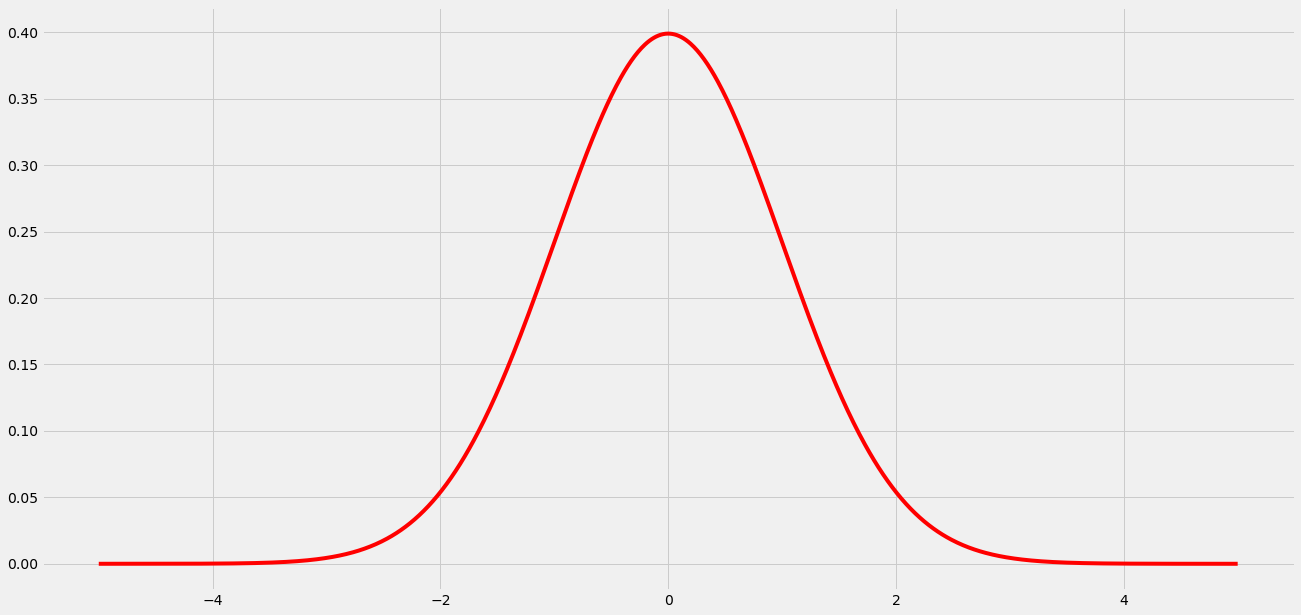

In [14]:
# Create x values ( 1000 values between -5 and 5)
x = np.linspace(-5.0, 5.0, 1000)

# Calculate y values from x
y = normalpdf(x)

# Create a plot
fig, ax = plt.subplots()

# Plot the values
ax.plot(x, y, 'r-')

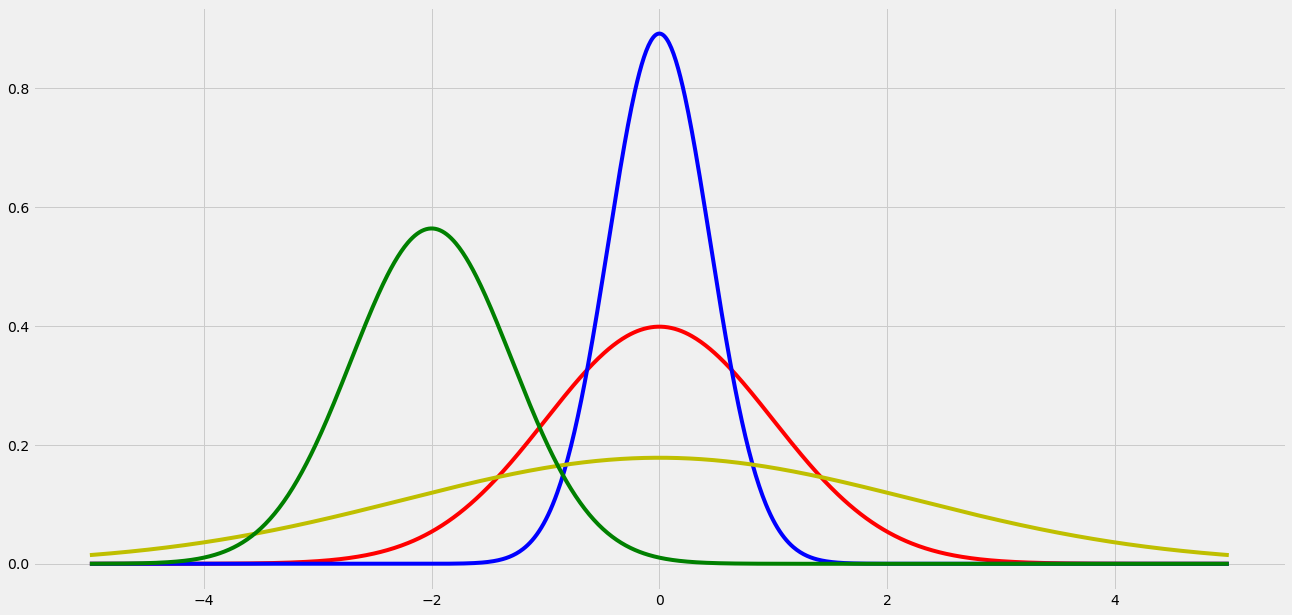

In [13]:
# Create a plot
fig, ax = plt.subplots()

# Create x values ( 1000 values between -5 and 5)
x = np.linspace(-5.0, 5.0, 1000)

# Calculate y values from x with mu = 0.0 and sigma = 1.0 (red plot)
y = normalpdf(x)
# Plot the values
ax.plot(x, y, 'r-')


# Calculate y values from x with mu = 0.0 and sigma = sqrt(0.2) (blue plot)
y = normalpdf(x, sigma = np.sqrt(0.2))
# Plot the values
ax.plot(x, y, 'b-')


# Calculate y values from x with mu = 0.0 and sigma = sqrt(5) (yellow plot)
y = normalpdf(x, sigma = np.sqrt(5))
# Plot the values
ax.plot(x, y, 'y-')


# Calculate y values from x with mu = -2 and sigma = sqrt(0.5) (green plot)
y = normalpdf(x, mu = -2.0, sigma = np.sqrt(0.5))
# Plot the values
ax.plot(x, y, 'g-')


<br>

## Fill between

Fills area between curve and x values

Text(0, 0.2, '~95%')

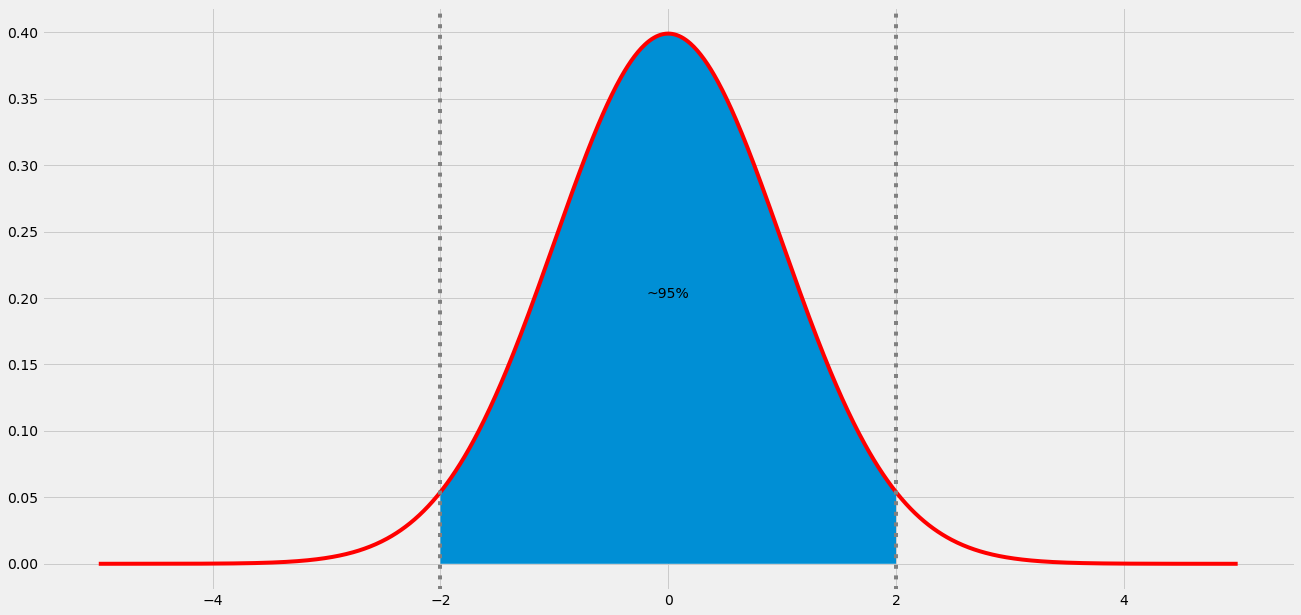

In [33]:
# Create x values ( 1000 values between -5 and 5)
x = np.linspace(-5.0, 5.0, 1000)

# Calculate y values from x
y = normalpdf(x)

# Create a plot
fig, ax = plt.subplots()

# Plot the values
ax.plot(x, y, 'r-')

# Limit x values to -2.0 and 2.0
x = np.linspace(-2.0, 2.0, 1000)

# Calculate the pdf values
y = normalpdf(x)

# Fill between x axis and y - for values between -2.0 and 2.0
ax.fill_between(x, 0, y)

# Draw vertical lines
ax.axvline(-2.0, color='grey', linestyle=':')
ax.axvline(2.0, color='grey', linestyle=':')

# Add text description
ax.text(0, 0.2, '~95%', ha='center')

In [19]:
# Cumulative Distribution Function
# Probability of a value being between -2 and 2
stats.norm().cdf(2.0) - stats.norm().cdf(-2.0)

0.9544997361036416

In [21]:
# Probability of value less than -2
stats.norm().cdf(-2.0)

0.022750131948179195

In [23]:
# Probability of a value less than 2
stats.norm().cdf(2.0)

0.9772498680518208

In [24]:
# Probability of a value being between -3 and 3
stats.norm().cdf(3.0) - stats.norm().cdf(-3.0)

0.9973002039367398

In [26]:
# Probability of a value being between -6 and 6 = Six Sigma
stats.norm().cdf(6.0) - stats.norm().cdf(-6.0)

0.9999999980268246

<br>

## Drawing several PDFs for a selection of values on the Iris data set

In [35]:
# Load the Iris dataset
df = pd.read_csv('https://raw.githubusercontent.com/ssteffens/pands-project2021/main/iris.data', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
# Extract Sepal Length
vals = df['sepal_length'].to_numpy()
vals

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [40]:
# Use only first 10 values
vals = vals[:10]
vals

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

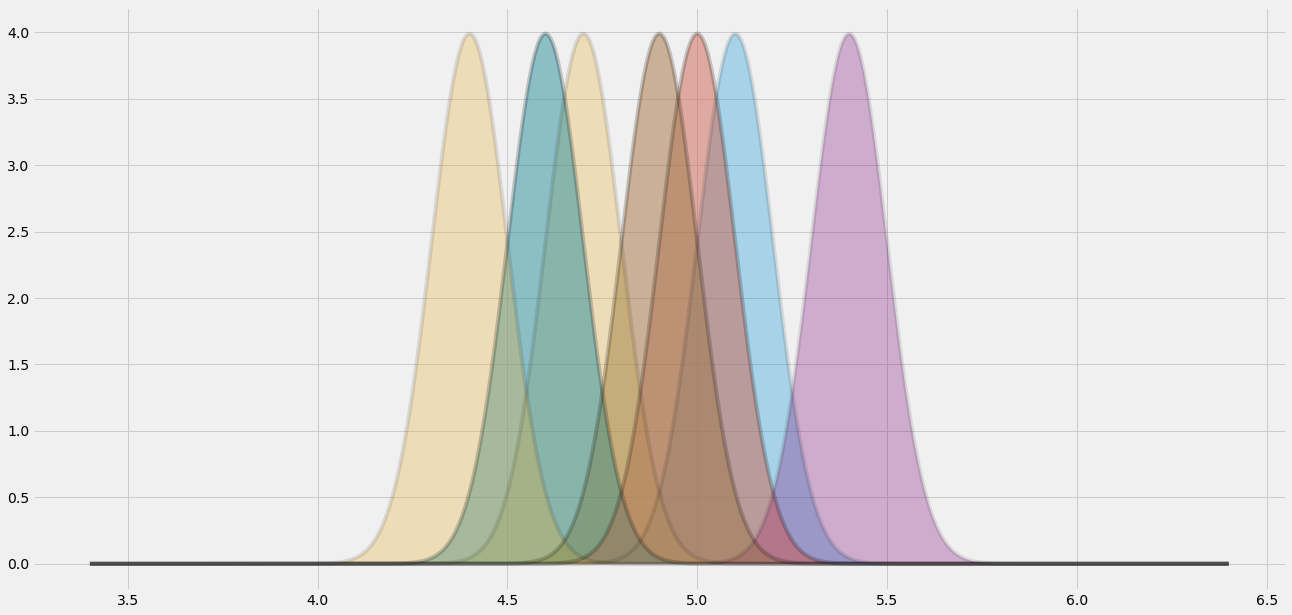

In [47]:
# Minimum and maximum values
low, high = vals.min(), vals.max()

# Create some space on the x axis
diff = high - low
low = low - diff
high = high + diff

# Create x values ( 1000 values between -5 and 5)
x = np.linspace(low, high, 1000)

# Create a plot
fig, ax = plt.subplots()

# Loop through values in vals and calculate y values from x
for i in vals: 
    y = normalpdf(x, mu = i, sigma = 0.1)

    # Plot the values
    ax.plot(x, y, 'k-', alpha = 0.1)

    # Fill between x axis and y
    ax.fill_between(x, 0, y, alpha = 0.3)

<br>

## Stack the individual probability density functions to achieve a KDE

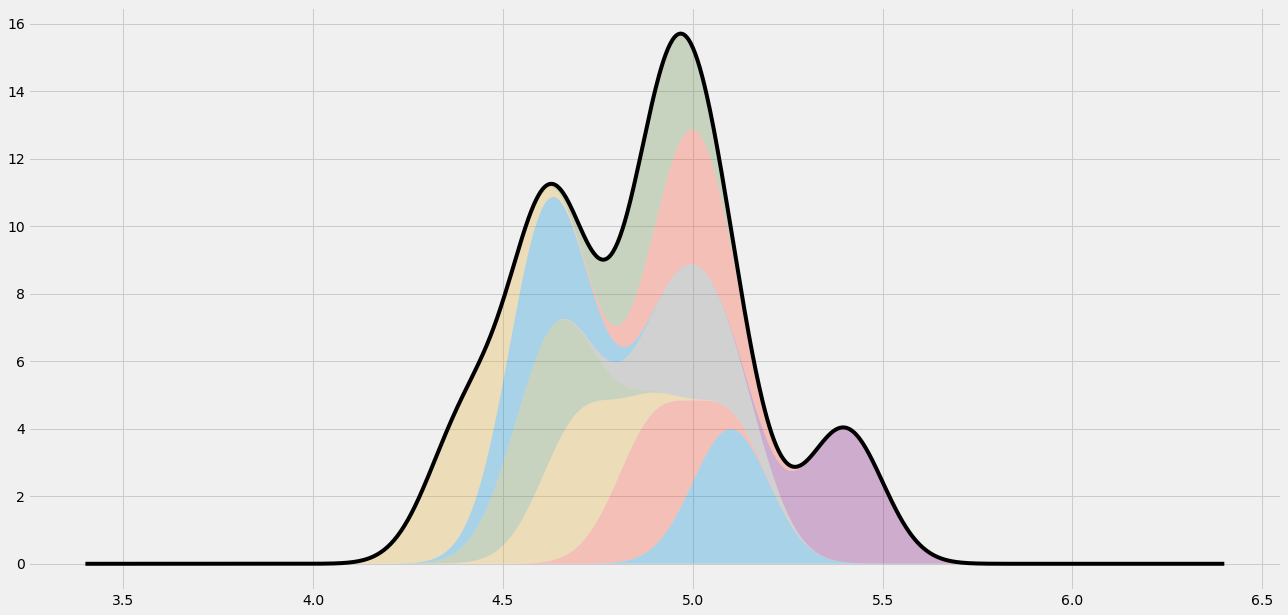

In [49]:
# Minimum and maximum values
low, high = vals.min(), vals.max()

# Create some space on the x axis
diff = high - low
low = low - diff
high = high + diff

# Create x values ( 1000 values between -5 and 5)
x = np.linspace(low, high, 1000)

# Create a plot
fig, ax = plt.subplots()

# Set the initiall previous y values to 0
prev = 0 * x

# Loop through values in vals and calculate y values from x
for i in vals: 
    y = normalpdf(x, mu = i, sigma = 0.1)
    # Add the previous sums of the y values
    y = y + prev

    # Fill between x axis and y
    ax.fill_between(x, prev, y, alpha = 0.3)
    
    # Update the prev array
    prev = y
    

# Plot the values
ax.plot(x, y, 'k-')

<br>

## Drawing KDE for the whole dataset

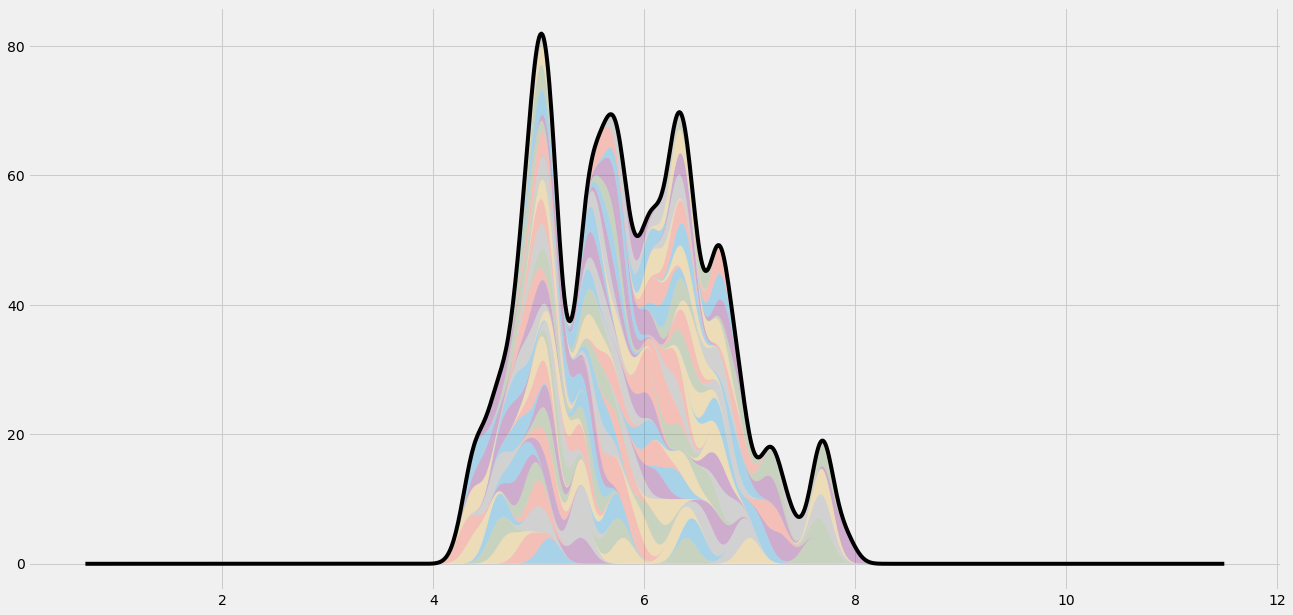

In [53]:
#Extract sepal length
vals = df['sepal_length'].to_numpy()

# Minimum and maximum values
low, high = vals.min(), vals.max()

# Create some space on the x axis
diff = high - low
low = low - diff
high = high + diff

# Create x values ( 1000 values between -5 and 5)
x = np.linspace(low, high, 1000)

# Create a plot
fig, ax = plt.subplots()

# Set the initiall previous y values to 0
prev = 0 * x

# Loop through values in vals and calculate y values from x
for i in vals: 
    y = normalpdf(x, mu = i, sigma = 0.1)
    # Add the previous sums of the y values
    y = y + prev

    # Fill between x axis and y
    ax.fill_between(x, prev, y, alpha = 0.3)
    
    # Update the prev array
    prev = y
    

# Plot the values
ax.plot(x, y, 'k-')

<br>

## Plot KDE Using Pandas

<AxesSubplot:ylabel='Density'>

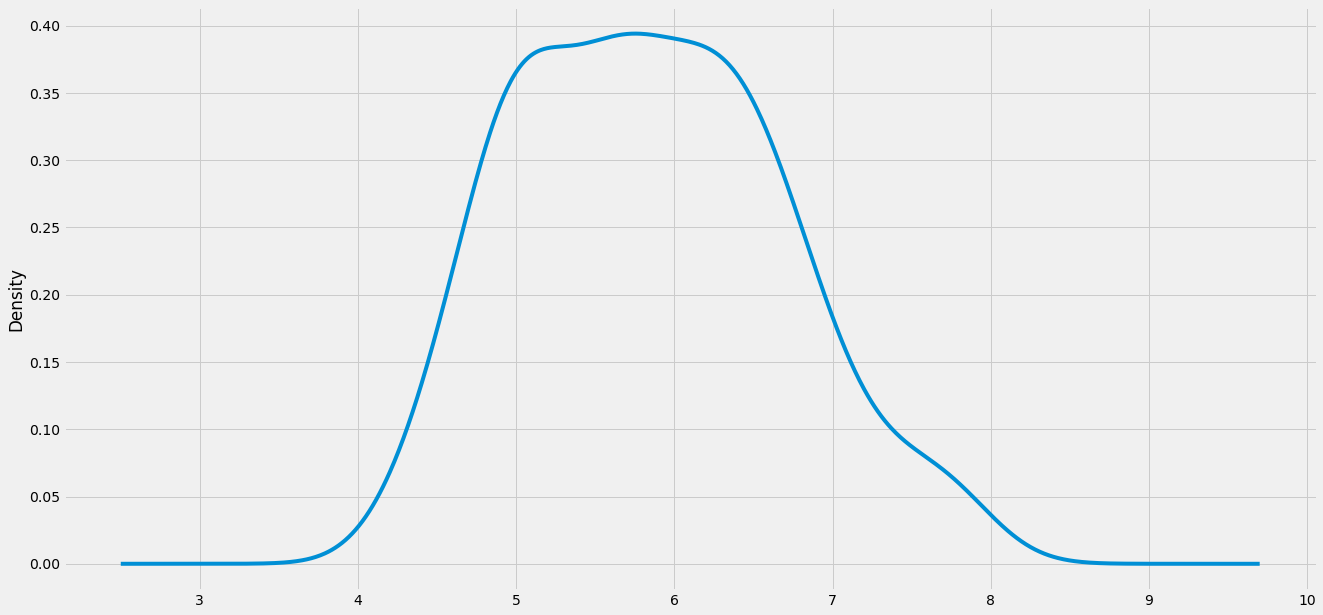

In [54]:
df['sepal_length'].plot.kde()

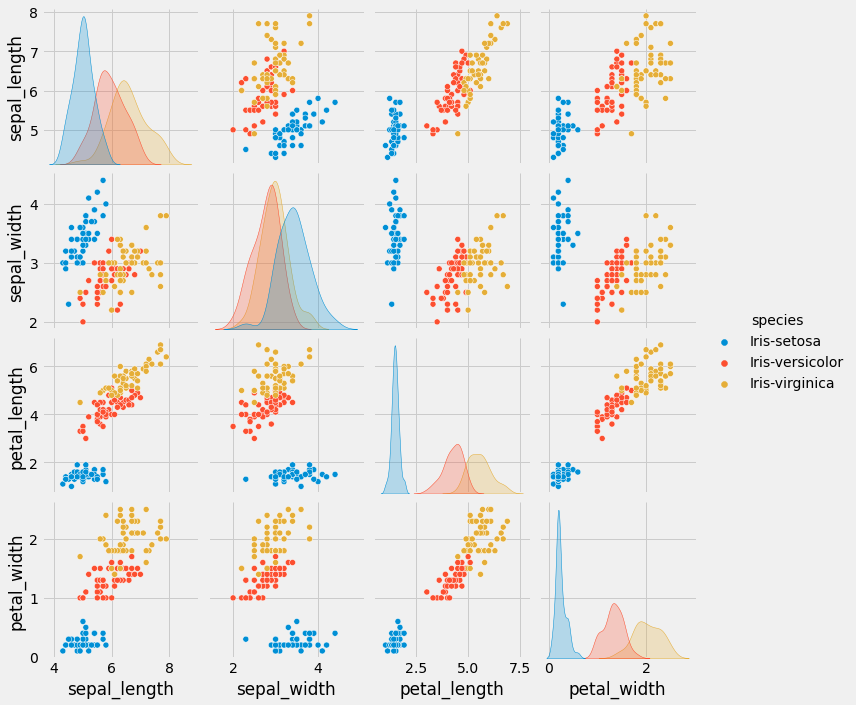

In [56]:
sns.pairplot(data=df, hue = 'species')